In [13]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [19]:
plt.rcParams['figure.figsize'] = (8, 6)

In [10]:
%matplotlib inline

In [89]:
g = nx.Graph()
g.add_edges_from([(0, 1), (0, 3), (0, 4),
                  (1, 2), (1, 4), (1, 5),
                  (2, 3), (2, 4), (2, 8),
                  (3, 4),
                  (5, 6), (5, 7), (5, 8),
                  (6, 7), (6, 8),
                  (7, 8)])  # properly labeled

In [76]:
def plot_graph(g, ax=None, prog: str = 'neato', title=None, orig_pos=None):
    if orig_pos is None:
        orig_pos = {}
    pos = nx.nx_agraph.graphviz_layout(g, prog=prog)

    for node, orig_pos in orig_pos.items():
        if node in pos:
            pos[node] = orig_pos

    colors = nx.get_node_attributes(g, 'colors')
    if len(colors) != 0:
        node_color = colors.values()
    else:
        node_color = 'blue'

    nx.draw_networkx_nodes(g, ax=ax, pos=pos, alpha=0.5, node_size=800, node_color=node_color)
    nx.draw_networkx_labels(g, ax=ax, pos=pos, font_color='w', font_size=17)
    nx.draw_networkx_edges(g, ax=ax, pos=pos, alpha=0.35, width=4)
    
    edge_wts = nx.get_edge_attributes(g, 'weight')
    for k, v in edge_wts.items():
        if v == 1:
            edge_wts[k] = ''
        else:
            edge_wts[k] = str(int(v))
    nx.draw_networkx_edge_labels(g, ax=ax, pos=pos, edge_labels=edge_wts, font_size=15)
    
    if title is None:
        title = g.name
    plt.title(title, fontsize=40)
    plt.style.use('seaborn-white')
    plt.grid(False)
    return

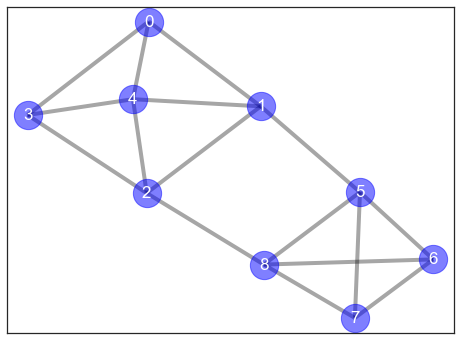

In [80]:
plot_graph(g)

In [94]:
g0 = nx.Graph(g)
A0 = nx.adjacency_matrix(g0, nodelist=sorted(g.nodes())).todense()

In [95]:
A0, A0.shape  # original graph's matrix

(matrix([[0, 1, 0, 1, 1, 0, 0, 0, 0],
         [1, 0, 1, 0, 1, 1, 0, 0, 0],
         [0, 1, 0, 1, 1, 0, 0, 0, 1],
         [1, 0, 1, 0, 1, 0, 0, 0, 0],
         [1, 1, 1, 1, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 1, 1, 1],
         [0, 0, 0, 0, 0, 1, 0, 1, 1],
         [0, 0, 0, 0, 0, 1, 1, 0, 1],
         [0, 0, 1, 0, 0, 1, 1, 1, 0]], dtype=int64),
 (9, 9))

In [104]:
S0 = np.zeros((9, 8))
one_idxs = [(0, 0), (1, 1), (2, 2), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 7)]
rows, cols = zip(*one_idxs)
S0[rows, cols] = 1
S0, S0.shape

(array([[1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.]]),
 (9, 8))

In [105]:
A1 = S0.T * A0 * S0

In [106]:
A1

matrix([[0., 1., 1., 1., 0., 0., 0., 0.],
        [1., 0., 1., 1., 1., 0., 0., 0.],
        [1., 1., 2., 2., 0., 0., 0., 1.],
        [1., 1., 2., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 0., 1., 1.],
        [0., 0., 0., 0., 1., 1., 0., 1.],
        [0., 0., 1., 0., 1., 1., 1., 0.]])

In [107]:
G1 = nx.from_numpy_array(A1)

In [108]:
G1.edges(data=True)

EdgeDataView([(0, 1, {'weight': 1.0}), (0, 2, {'weight': 1.0}), (0, 3, {'weight': 1.0}), (1, 2, {'weight': 1.0}), (1, 3, {'weight': 1.0}), (1, 4, {'weight': 1.0}), (2, 2, {'weight': 2.0}), (2, 3, {'weight': 2.0}), (2, 7, {'weight': 1.0}), (4, 5, {'weight': 1.0}), (4, 6, {'weight': 1.0}), (4, 7, {'weight': 1.0}), (5, 6, {'weight': 1.0}), (5, 7, {'weight': 1.0}), (6, 7, {'weight': 1.0})])

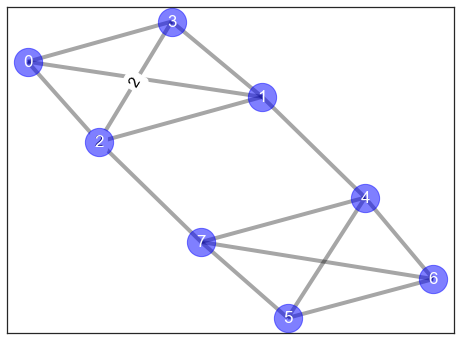

In [109]:
plot_graph(G1)

AttributeError: 'Graph' object has no attribute '__name__'

In [115]:
S0.shape

(9, 8)

In [118]:
S0.shape, S0.T.shape

((9, 8), (8, 9))

In [120]:
S_ = np.matmul(S0, S0.T)

In [127]:
A0, S_

(matrix([[0, 1, 0, 1, 1, 0, 0, 0, 0],
         [1, 0, 1, 0, 1, 1, 0, 0, 0],
         [0, 1, 0, 1, 1, 0, 0, 0, 1],
         [1, 0, 1, 0, 1, 0, 0, 0, 0],
         [1, 1, 1, 1, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 1, 1, 1],
         [0, 0, 0, 0, 0, 1, 0, 1, 1],
         [0, 0, 0, 0, 0, 1, 1, 0, 1],
         [0, 0, 1, 0, 0, 1, 1, 1, 0]], dtype=int64),
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.]]))